In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as spy
import numpy as np

Data taken from [Sociopatterns.org Primary School Dataset](http://www.sociopatterns.org/datasets/primary-school-cumulative-networks/)

In [2]:
G = nx.read_gexf("data/sp_data_school_day_1.gz")

C:\Users\Misha\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


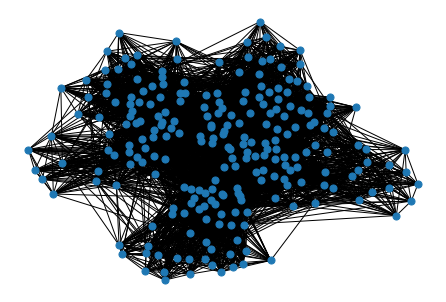

In [3]:
nx.draw(G, with_labels = False, font_weight='bold', node_size = 50)

In [4]:
G.node['1922']

{'classname': '2A',
 'gender': 'F',
 'viz': {'color': {'r': 97, 'g': 255, 'b': 250},
  'size': 10.0,
  'position': {'x': -381.63947, 'y': 18.247772, 'z': 0.0}},
 'label': '1922'}

In [5]:
G.degree['1922']

24

In [6]:
G.node['1922']['viz']['color']

{'r': 97, 'g': 255, 'b': 250}

Using an adaptation of the approach taken from the following [stackoverflow question](https://stackoverflow.com/questions/43265020/apply-color-to-specific-node-networkx) to color each node appropriately

In [7]:
def convert_to_hex(node) :
    if 'color' in node['viz']:
        red = node['viz']['color']['r']
        green = node['viz']['color']['g']
        blue = node['viz']['color']['b']
    else:
        red = 255
        green = 255
        blue = 255
    return '#%02x%02x%02x' % (red, green, blue)

In [9]:
colormap = []
gendercmp = []
for n in G:
    colormap.append(convert_to_hex(G.node[str(n)]))
    if G.node[str(n)]['gender'] == 'F':
        gendercmp.append('pink')
    elif G.node[str(n)]['gender'] == 'M':
        gendercmp.append('green')
    else:
        gendercmp.append('white')

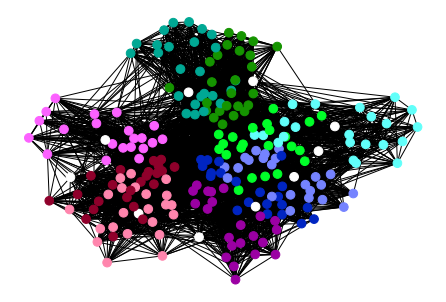

In [11]:
nx.draw(G, with_labels = False, font_weight='bold', node_size = 75, node_color = colormap)

##### Visualizing the nodes by gender

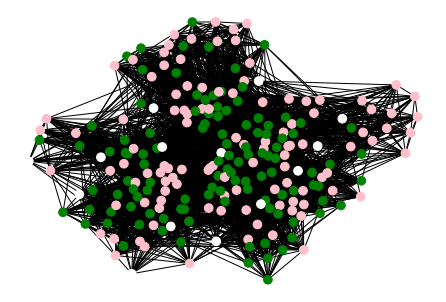

In [12]:
nx.draw(G, with_labels = False, font_weight='bold', node_size = 75, node_color = gendercmp)

##### Subsetting the data by Gender and evaluating relative centrality metrics

In [30]:
Eigen_cent = nx.eigenvector_centrality(G)
f_d_cent = []
m_d_cent = []
f_e_cent = []
m_e_cent = []
for n in G.nodes:
    G.node[str(n)]['cent'] = G.degree[str(n)]/len(G)
    G.node[str(n)]['Eigen_c'] = Eigen_cent[str(n)]
    if G.node[str(n)]['gender'] == 'F':
        f_d_cent.append(G.degree[str(n)]/len(G))
        f_e_cent.append(Eigen_cent[str(n)])
    elif G.node[str(n)]['gender'] == 'M':
        m_d_cent.append(G.degree[str(n)]/len(G))
        m_e_cent.append(Eigen_cent[str(n)])

In [32]:
np.mean(f_d_cent)

0.1976502311248074

In [33]:
np.mean(m_d_cent)

0.23097003631961258

In [34]:
spy.stats.ttest_ind(f_d_cent,m_d_cent)

Ttest_indResult(statistic=-3.130962171196755, pvalue=0.001978790853996796)

Based on the results of the t-test we can conclude that the average degree centrality of the female population is statistically significantly lower than that of the male population of the school. 

#### Visualizing the two populations separately

In [13]:
female_nodes = [n for n,v in G.nodes(data = True) if v['gender'] == 'F']
male_nodes = [n for n,v in G.nodes(data = True) if v['gender'] == 'M']

In [14]:
F = G.subgraph(female_nodes)
M = G.subgraph(male_nodes)

##### Female Nodes Only

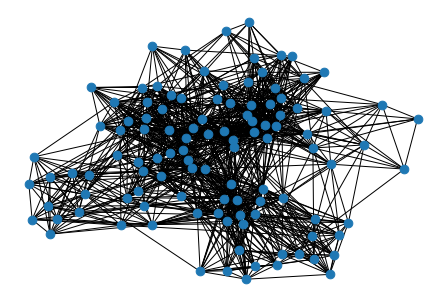

In [15]:
nx.draw(F, node_size = 75)

##### Male Nodes Only

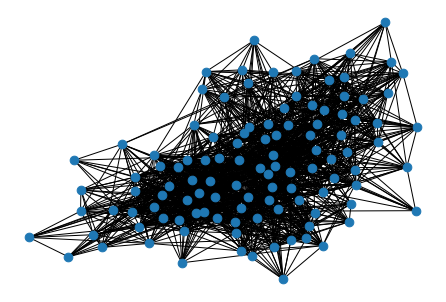

In [16]:
nx.draw(M, node_size = 75)